In [1]:
%matplotlib inline
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from root_numpy import root2array

In [2]:
filedir = '/Users/davidkaleko/Data/larlite/082416_selection_output/'
#!ls -ltra $filedir

track_producer = 'pandoraNuPMA'
vtx_producer = 'pmtrack'

mcnu = 'ana_out_trk%s_vtx%s_mcc71ext2bnb3_1.root'%(track_producer,vtx_producer)
datanu = 'ana_out_trk%s_vtx%s_mcc71ext2bnb3_3.root'%(track_producer,vtx_producer)
databkg = 'ana_out_trk%s_vtx%s_mcc71ext2bnb3_2.root'%(track_producer,vtx_producer)

files = { 'mcnu' : filedir + mcnu, 
         'datanu' : filedir + datanu, 
         'databkg' : filedir + databkg }

In [3]:
df_dict = {}

for sample, filepath in files.iteritems():
    df_dict[sample] = pd.DataFrame( root2array ( filepath, 'MCS_bias_tree' ) )
    
    #temp adding column
    df_dict[sample]['MCS_linecut'] = df_dict[sample]['full_MCS_energy'] > \
        (0.15 + 1.25*df_dict[sample]['full_range_energy'])

In [4]:
print df_dict['mcnu'].columns.values

['length_analyzed' 'full_length' 'full_range_energy' 'MCS_energy'
 'full_MCS_energy' 'MCS_linecut']


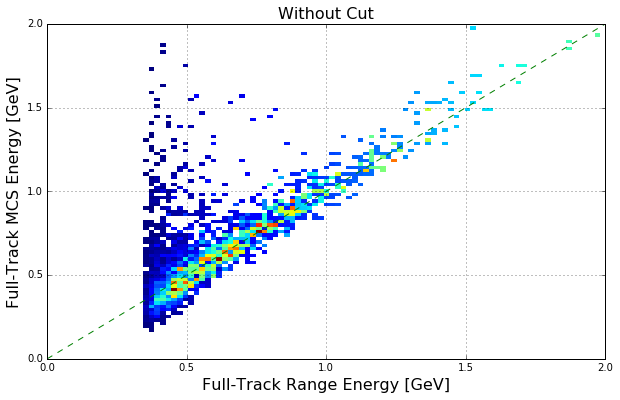

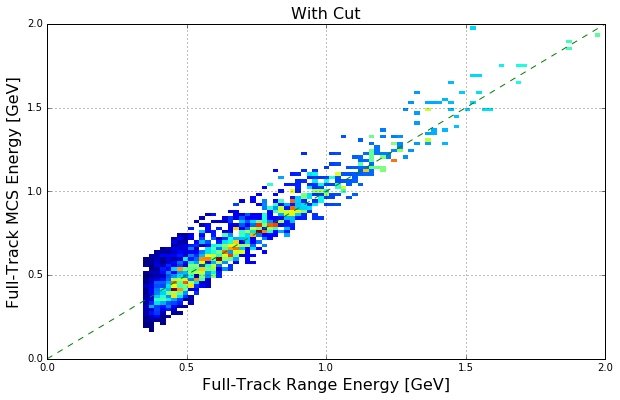

In [5]:

plt.figure(figsize=(10,6))

myy = df_dict['mcnu']['full_MCS_energy']
myx = df_dict['mcnu']['full_range_energy']

fuck = plt.hist2d(x=myx,y=myy,bins=np.linspace(0,2,100),cmin=1)
plt.grid(True)
fart = plt.xlabel("Full-Track Range Energy [GeV]",fontsize=16)
fart = plt.ylabel("Full-Track MCS Energy [GeV]",fontsize=16)

plt.plot([0,8],[0,8],'g--')
plt.plot([0,8],[2.5,2.5],'r--')
plt.plot([2.5,2.5],[0,8],'r--')
plt.title("Without Cut",fontsize=16)

plt.figure(figsize=(10,6))

myy = df_dict['mcnu'].query('not MCS_linecut')['full_MCS_energy']
myx = df_dict['mcnu'].query('not MCS_linecut')['full_range_energy']

fuck = plt.hist2d(x=myx,y=myy,bins=np.linspace(0,2,100),cmin=1)
plt.grid(True)
fart = plt.xlabel("Full-Track Range Energy [GeV]",fontsize=16)
fart = plt.ylabel("Full-Track MCS Energy [GeV]",fontsize=16)

plt.plot([0,8],[0,8],'g--')
blah = plt.title("With Cut",fontsize=16)

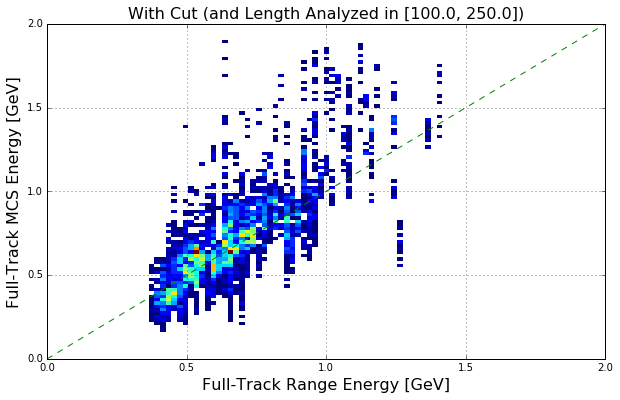

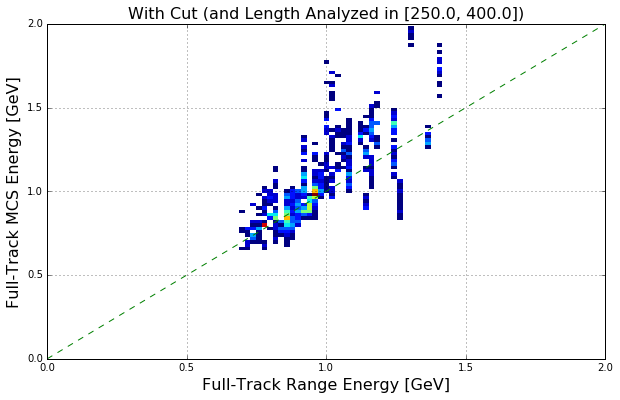

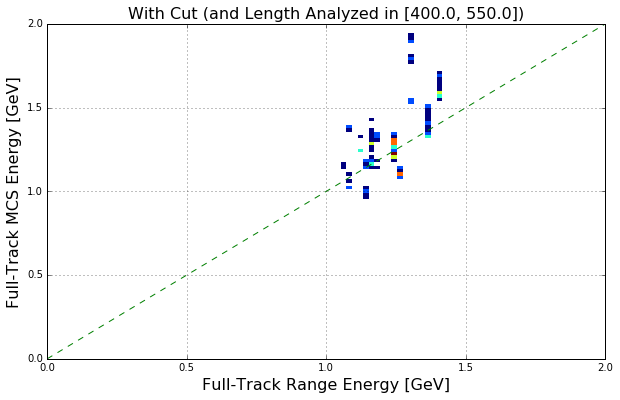

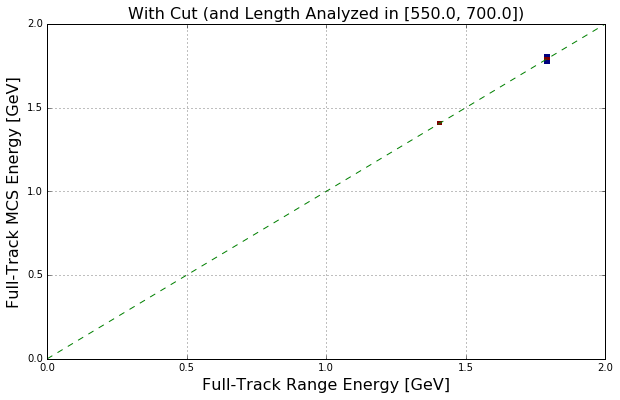

In [7]:
mylen_mins = np.linspace(100,700,5)
for x in xrange(len(mylen_mins)-1):
    mylen_min = mylen_mins[x]
    mylen_max = mylen_mins[x+1]
    plt.figure(figsize=(10,6))

    myquery = 'not MCS_linecut and length_analyzed > %f and length_analyzed < %f'%(mylen_min,mylen_max)
    myquery += ' and (full_length - length_analyzed > 10)'

    myy = df_dict['datanu'].query(myquery)['MCS_energy']
    myx = df_dict['datanu'].query(myquery)['full_range_energy']
    
    fuck = plt.hist2d(x=myx,y=myy,bins=np.linspace(0,2,100),cmin=1)
    plt.grid(True)
    fart = plt.xlabel("Full-Track Range Energy [GeV]",fontsize=16)
    fart = plt.ylabel("Full-Track MCS Energy [GeV]",fontsize=16)
    
    plt.plot([0,8],[0,8],'g--')
    plt.title("With Cut (and Length Analyzed in [%0.1f, %0.1f])" % (mylen_min,mylen_max),fontsize=16)

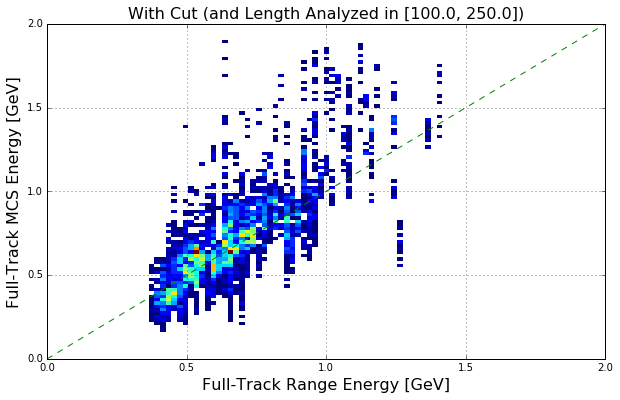

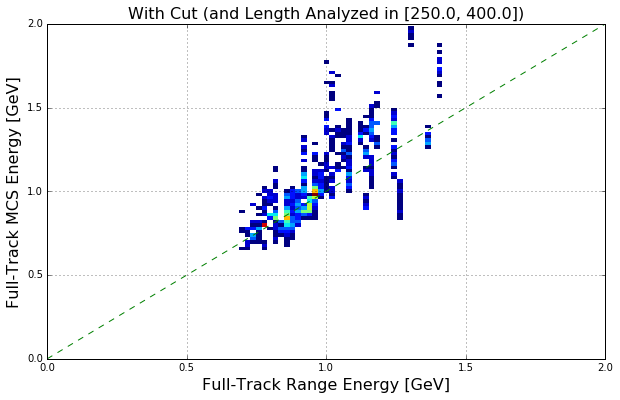

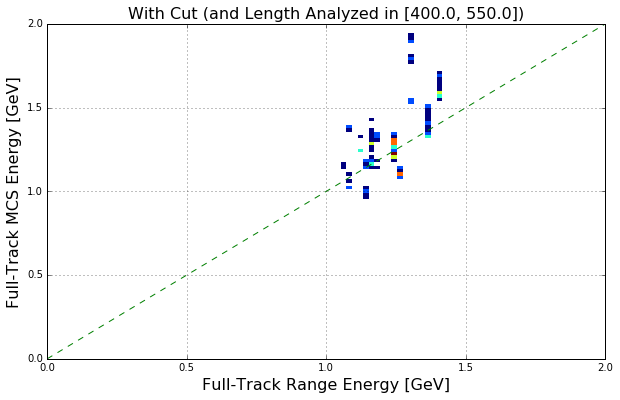

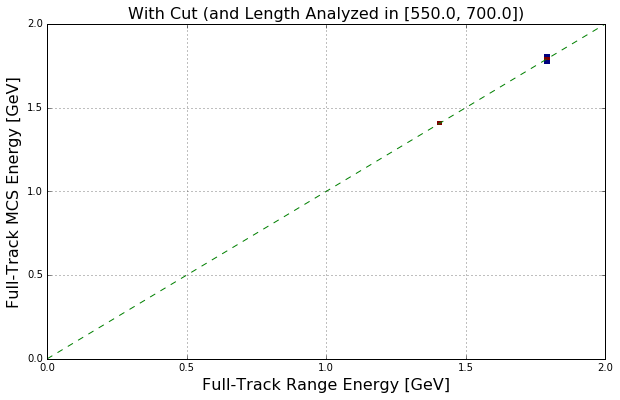

In [95]:
mylen_mins = np.linspace(100,700,5)
for x in xrange(len(mylen_mins)-1):
    mylen_min = mylen_mins[x]
    mylen_max = mylen_mins[x+1]
    plt.figure(figsize=(10,6))

    myquery = 'not MCS_linecut and length_analyzed > %f and length_analyzed < %f'%(mylen_min,mylen_max)
    myquery += ' and (full_length - length_analyzed > 10)'
    
    myy = df_dict['datanu'].query(myquery)['MCS_energy']
    myx = df_dict['datanu'].query(myquery)['full_range_energy']
    
    fuck = plt.hist2d(x=myx,y=myy,bins=np.linspace(0,2,100),cmin=1)
    plt.grid(True)
    fart = plt.xlabel("Full-Track Range Energy [GeV]",fontsize=16)
    fart = plt.ylabel("Full-Track MCS Energy [GeV]",fontsize=16)
    
    plt.plot([0,8],[0,8],'g--')
    plt.title("With Cut (and Length Analyzed in [%0.1f, %0.1f])" % (mylen_min,mylen_max),fontsize=16)

In [ ]:
print df_dict['datanu'].columns.values

In [92]:
#reco-true/true
def money_plot():
    mytypes = ['mcnu','datanu']
    binning = np.linspace(120,450,15)
    binwidth = float(binning[1]-binning[0])
    bincenters = binning + (binwidth/2)
    myreses, mystds, myerrs = {}, {}, {}
    for mytype in mytypes:
        myreses[mytype], mystds[mytype], myerrs[mytype] = [], [], []
        
    for x in xrange(len(binning)-1):
        binmin = binning[x]
        binmax = binning[x+1]
        myquery = 'not MCS_linecut and length_analyzed > %f and length_analyzed < %f'%(binmin,binmax)
        myquery += ' and ( (full_length - length_analyzed) > 20)'
        for sample in mytypes:
            mydf = df_dict[sample].query(myquery)
            true = mydf['full_range_energy'].values
            reco = mydf['MCS_energy'].values
            mymean = ((reco-true)/true).mean()
            myntrue = float(len(true))
            mynreco = float(len(reco))
            myerr = 0
            if myntrue and mynreco:
                myerr = mymean * ( np.sqrt( (1/myntrue) + (1/mynreco) ) )
            myreses[sample].append( mymean )
            mystds[sample].append( ((reco-true)/true).std() )
            myerrs[sample].append( myerr )
            
    plt.figure(figsize=(10,6))
    for mytype in mytypes:
        #plt.plot(bincenters[:-1],myreses[mytype],'o--',label='Mean of Distribution (%s)'%mytype)
        #plt.plot(bincenters[:-1],mystds[mytype],'o--',label='Std of Distribution (%s)'%mytype)
        plt.errorbar(bincenters[:-1],myreses[mytype],yerr=myerrs[sample],fmt='o--',label='Mean of Distribution (%s)'%mytype)
    plt.ylabel('$\\frac{MCS Energy - Range Energy}{Range Energy}$: Mean, or Std',fontsize=15)
    plt.xlabel('Length of Track (Up to 20cm Before End Of Track)',fontsize=15)
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('MCS Bias (Pretending Contained Tracks are Exiting)',fontsize=16)
    #plt.ylim((-0.05,0.2))


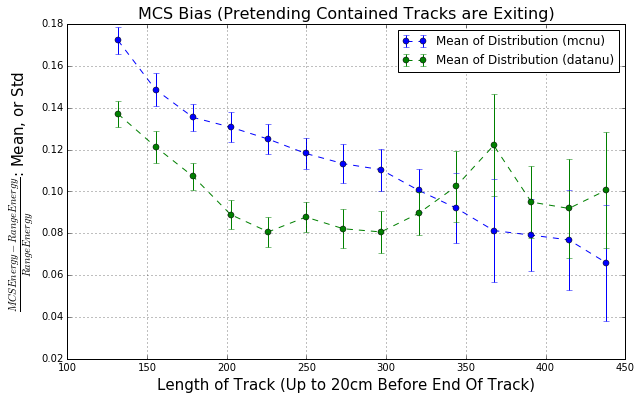

In [93]:
money_plot()